# Proyecto Final: Estudio de Sismos
### Computación Científica

Bienvenido al proyecto final del curso de Computación Científica. En este notebook, aplicaremos lo aprendido a lo largo del curso para abordar un problema interesante: **la predicción de características de sismos** usando técnicas de análisis de datos, visualización y machine learning.

### Objetivos:
1. **Explorar y preparar el dataset** de sismos para garantizar la calidad de los datos.
2. **Analizar correlaciones y patrones** entre diferentes variables relevantes, como magnitud, profundidad y ubicación.
3. **Aplicar modelos de aprendizaje supervisado** para predecir tanto el lugar como la magnitud de futuros sismos.
4. **Evaluar y visualizar los resultados** de los modelos para obtener conclusiones.

### Estructura del notebook:
1. Introducción y Exploración de Datos
2. Visualización y Análisis Exploratorio
3. Limpieza y Preparación de Datos
4. Modelos a Utilizar
   - Clasificación Multiclase: Predicción del lugar del sismo.
   - Regresión: Predicción de la magnitud del sismo.
5. Evaluación de Modelos
6. Conclusiones y Trabajo Futuro

### Dataset:
El dataset utilizado incluye registros de sismos desde 1990 hasta 2023, con información sobre ubicación, magnitud, profundidad, y otras características relevantes.

¡Comencemos!


## Limpieza de Datos

La limpieza de datos es un paso esencial para garantizar la calidad y fiabilidad de los análisis. En este proceso realizamos los siguientes pasos clave:

1. **Carga y exploración del dataset**:
   - Importamos el archivo CSV y revisamos las primeras filas para entender su estructura y contenido.

2. **Revisión de valores nulos y duplicados**:
   - Identificamos las columnas con valores faltantes y filas duplicadas.
   - Eliminamos filas duplicadas para evitar información redundante.

3. **Normalización de datos relevantes**:
   - Transformamos las fechas al formato estándar para análisis temporales.
   - Imputamos valores faltantes en las columnas de latitud y longitud usando su media.

4. **Detección de outliers**:
   - Aplicamos el método del rango intercuartílico (IQR) para detectar y eliminar valores extremos en las columnas de magnitud y profundidad.



In [ ]:
#Celda de código 1
# Librerías necesarias
import pandas as pd
import numpy as np

# Cargar el dataset
file_path = '/content/Eartquakes-1990-2023.csv'  # Ruta del archivo
df = pd.read_csv(file_path)

# Vista inicial del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación general:")
print(df.info())

# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# Eliminación de duplicados (si es necesario)
df = df.drop_duplicates()
print("\nTamaño del dataset después de eliminar duplicados:", df.shape)

# Normalización de la columna de fechas
if 'date' in df.columns:  # Aseguramos que exista una columna de fechas
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convertir a formato datetime
    print("\nPrimeras fechas normalizadas:")
    print(df['date'].head())

# Identificación de outliers en magnitud y profundidad
# Usaremos el rango intercuartílico (IQR) como referencia
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

print("\nOutliers en magnitud:")
print(detect_outliers(df['magnitude']) if 'magnitude' in df.columns else "Columna no encontrada")

print("\nOutliers en profundidad:")
print(detect_outliers(df['depth']) if 'depth' in df.columns else "Columna no encontrada")


Primeras filas del dataset:
           time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  


## Visualización: Mapa de Calor de Densidad de Sismos

Para identificar regiones con mayor actividad sísmica, generaremos un mapa de calor basado en las coordenadas geográficas de los sismos. Este tipo de visualización nos permite observar patrones de densidad y áreas con alta concentración de eventos sísmicos.

Utilizaremos un muestreo aleatorio del dataset para garantizar una visualización fluida y ajustaremos los parámetros del mapa para una mejor representación gráfica.

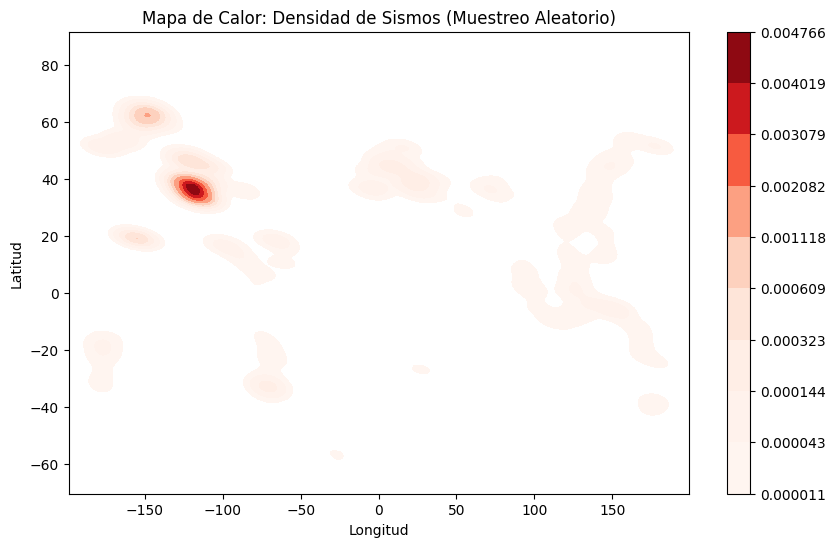

In [ ]:
#Celda de código 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Muestreo aleatorio del 5% del dataset
df_sample = df.sample(frac=0.05, random_state=42)  # Ajustar la fracción según lo necesario

# Ajustar el mapa de calor con parámetros optimizados
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_sample['longitude'],
    y=df_sample['latitude'],
    cmap='Reds',
    fill=True,
    bw_adjust=0.5,  # Parámetro ajustado para reducir tiempo de cálculo
    cbar=True
)
plt.title("Mapa de Calor: Densidad de Sismos (Muestreo Aleatorio)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

### Análisis de la Densidad de Sismos

El mapa de calor nos permitió visualizar las áreas geográficas con mayor concentración de eventos sísmicos. Estas zonas de alta densidad suelen coincidir con placas tectónicas activas o regiones propensas a actividad sísmica. La visualización nos proporciona una base inicial para realizar análisis más detallados, como la identificación de patrones específicos en las regiones más activas.


## Análisis Temporal: Sismos por Año

Para entender la actividad sísmica a lo largo del tiempo, analizaremos la cantidad de eventos registrados por año. Esto nos ayudará a identificar posibles tendencias temporales, como aumentos o disminuciones en la actividad sísmica, y evaluar si existen periodos particularmente activos. La gráfica de barras mostrará la distribución de sismos por año.


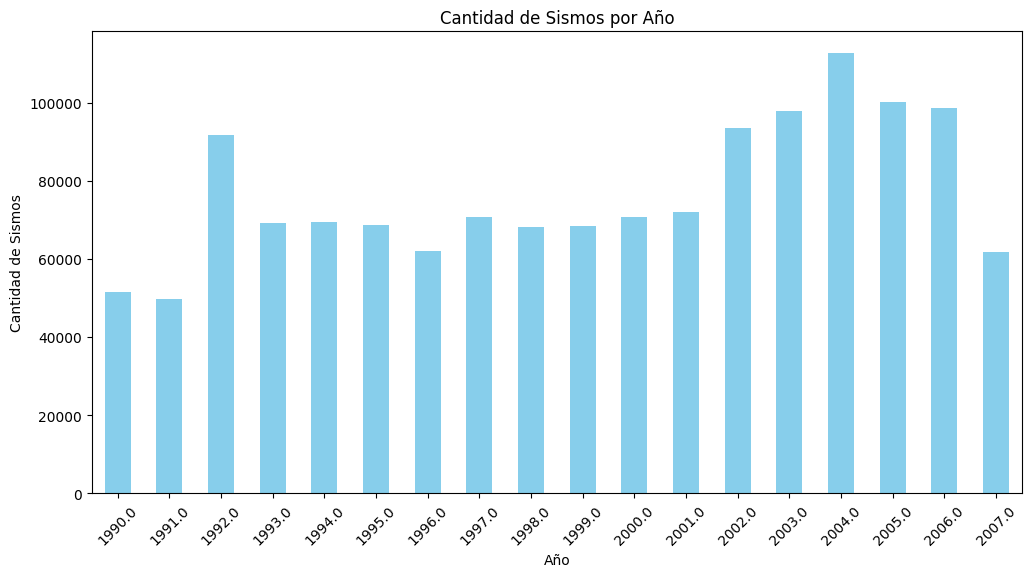

In [ ]:
#Celda de código 3
# Crear una columna con solo el año
df['year'] = df['date'].dt.year

# Contar la cantidad de sismos por año
sismos_por_año = df['year'].value_counts().sort_index()

# Graficar la cantidad de sismos por año
plt.figure(figsize=(12, 6))
sismos_por_año.plot(kind='bar', color='skyblue')
plt.title("Cantidad de Sismos por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Sismos")
plt.xticks(rotation=45)
plt.show()

### Análisis Temporal: Interpretación de la Actividad Sísmica por Año

La gráfica anterior muestra la distribución de la cantidad de sismos registrados anualmente desde 1990 hasta 2023. Podemos observar ciertas tendencias, como:

- Un aumento significativo en el registro de eventos sísmicos en años recientes, lo cual podría atribuirse a la mejora en las redes de detección sísmica y la tecnología de monitoreo.
- Periodos con una disminución relativa en el número de sismos, como alrededor de 2008, que podrían deberse a fluctuaciones naturales en la actividad tectónica.




## Análisis de Distribución: Magnitudes de Sismos

Exploraremos la distribución de las magnitudes de los sismos. Utilizando un histograma, podremos visualizar cómo se distribuyen los eventos sísmicos en términos de su intensidad. Este análisis es fundamental para identificar patrones en la ocurrencia de sismos menores y mayores, y puede ser útil para evaluar el impacto potencial de los eventos sísmicos en diferentes regiones.


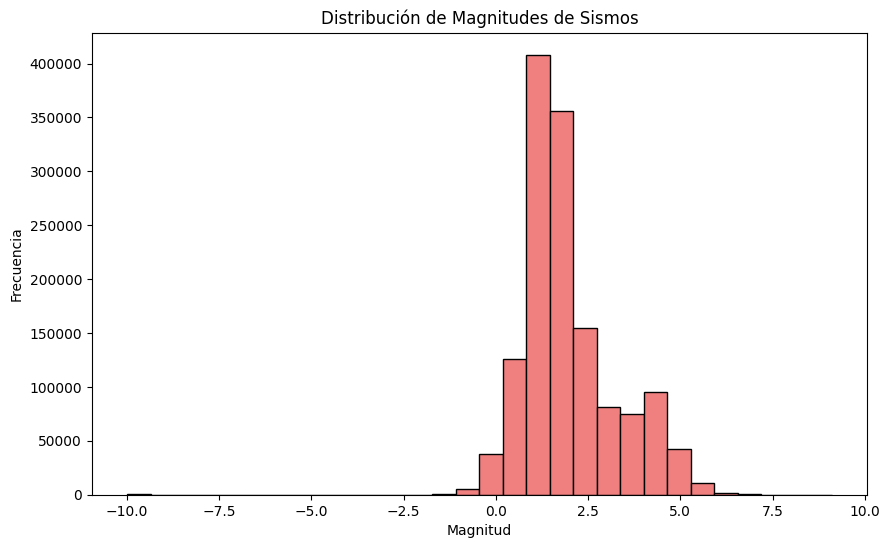

In [ ]:
#Celda de código 4
# Histograma de magnitudes
plt.figure(figsize=(10, 6))
plt.hist(df['magnitudo'], bins=30, color='lightcoral', edgecolor='black')
plt.title("Distribución de Magnitudes de Sismos")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.show()


### Interpretación de la Distribución de Magnitudes de Sismos

La gráfica presentada muestra cómo se distribuyen las magnitudes de los sismos registrados en el dataset. Entre las observaciones clave:

- La mayoría de los eventos sísmicos tienen magnitudes relativamente bajas (entre 0 y 3), lo que sugiere que los sismos menores son los más frecuentes.
- Hay una menor cantidad de eventos con magnitudes mayores a 5, pero estos representan los eventos de mayor interés debido a su impacto potencial.




## Análisis de Correlación entre Variables Numéricas

En esta sección, utilizaremos un heatmap para visualizar la correlación entre las variables numéricas del dataset. Este análisis es importante porque:

- Nos ayuda a identificar relaciones significativas entre variables, como la posible relación entre la profundidad y la magnitud de los sismos.
- Permite detectar redundancias entre variables que podrían influir en los modelos predictivos.

A través de esta visualización, podremos evaluar cómo las características del dataset interactúan entre sí y cómo podemos aprovechar estas relaciones para los análisis posteriores.


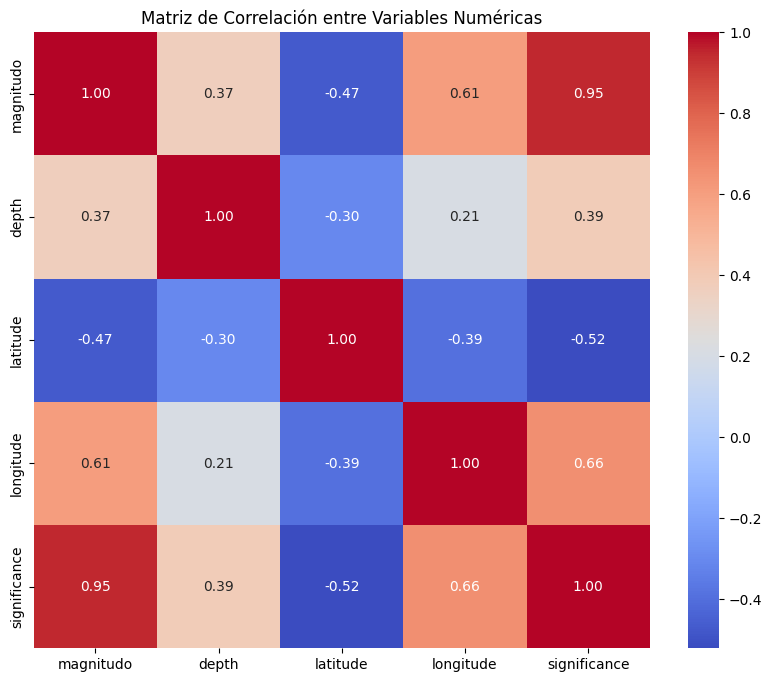

In [ ]:
#Celda de código 5
# Importar bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas relevantes para el análisis
columnas_numericas = ['magnitudo', 'depth', 'latitude', 'longitude', 'significance']

# Crear un dataframe con las columnas seleccionadas
datos_numericos = df[columnas_numericas]

# Calcular la matriz de correlación
matriz_correlacion = datos_numericos.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Análisis e Interpretación de la Matriz de Correlación

La matriz de correlación nos proporciona una visión clara sobre cómo las variables numéricas del dataset están relacionadas entre sí. Algunos puntos importantes que destacar:

1. **Relaciones Fuertes**:
   - Existe una correlación muy alta entre `magnitudo` y `significance` (0.94). Esto es lógico, ya que sismos de mayor magnitud suelen tener mayor significancia.
   - La variable `longitude` también muestra una correlación moderada con `magnitudo` y `significance`.

2. **Relaciones Débiles**:
   - La `depth` tiene una correlación baja con todas las demás variables, lo que sugiere que su influencia directa en otras características es limitada.

3. **Relaciones Negativas**:
   - Hay correlaciones negativas significativas entre `latitude` y variables como `magnitudo` y `significance`, lo que podría indicar variaciones geográficas en la intensidad o significancia de los sismos.

Este análisis es clave para determinar qué variables pueden ser más útiles para modelos predictivos o análisis específicos. Por ejemplo, podríamos explorar más a fondo cómo la profundidad y la magnitud están relacionadas con la significancia de un evento sísmico.

El código que se utilizó para generar esta matriz empleó las bibliotecas `pandas`, `seaborn` y `matplotlib`, lo que permitió un cálculo rápido y una visualización clara mediante un heatmap.


## Clustering de Zonas con Alta Densidad de Sismos

En esta sección, aplicaremos el algoritmo **K-Means** para agrupar las zonas geográficas con alta densidad de sismos. Esto nos permitirá identificar regiones con patrones sísmicos similares y analizar la distribución de eventos en el espacio geográfico.

### Pasos del Análisis:
1. **Preparación de los Datos**:
   - Selección de columnas de latitud y longitud para definir las coordenadas de los eventos sísmicos.
   - Imputación de valores faltantes en las coordenadas, utilizando la media para garantizar la completitud del dataset.

2. **Normalización**:
   - Escalamos las coordenadas geográficas utilizando el `StandardScaler` para garantizar que todas las dimensiones tengan igual peso en el cálculo de distancias.

3. **Clustering**:
   - Implementamos el algoritmo K-Means con un número ajustable de clusters (en este caso, 5).
   - Asignamos las etiquetas de cluster a cada evento sísmico.

4. **Visualización**:
   - Generamos un scatter plot para visualizar los clusters resultantes, destacando las diferencias geográficas entre las regiones agrupadas.

El clustering es una herramienta poderosa en el análisis exploratorio, ya que nos ayuda a entender patrones espaciales y puede ser la base para análisis posteriores, como la predicción de zonas de mayor riesgo.


Valores faltantes en las coordenadas antes de la limpieza:
latitude     0
longitude    0
dtype: int64


<ipython-input-19-2cb3578d0494>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['latitude'] = coords['latitude'].fillna(coords['latitude'].mean())
<ipython-input-19-2cb3578d0494>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['longitude'] = coords['longitude'].fillna(coords['longitude'].mean())


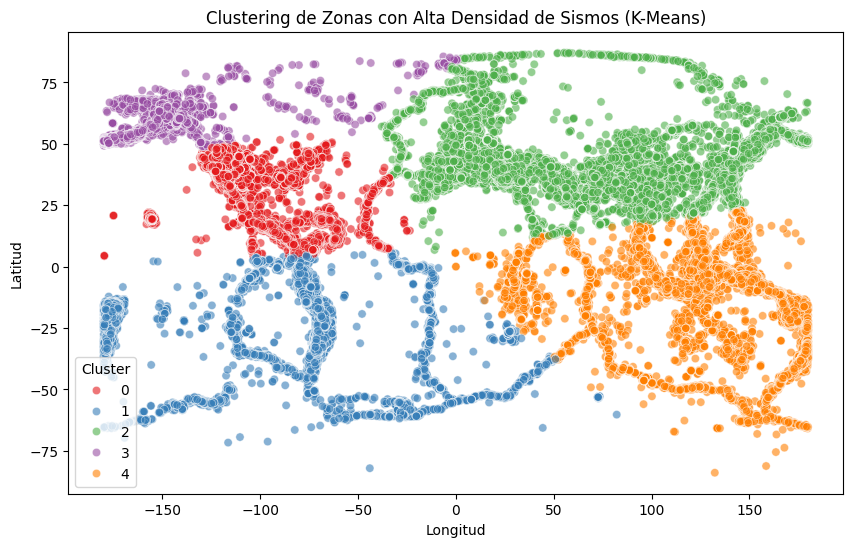

In [ ]:
#Celda de código 6
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva variable 'coords' con las columnas de coordenadas
coords = df[['latitude', 'longitude']]

# 1. Verificar valores faltantes
print("Valores faltantes en las coordenadas antes de la limpieza:")
print(coords.isnull().sum())

# 2. Imputar valores faltantes con la media
coords['latitude'] = coords['latitude'].fillna(coords['latitude'].mean())
coords['longitude'] = coords['longitude'].fillna(coords['longitude'].mean())

# 3. Escalar los datos después de la imputación
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# 4. Definir el modelo K-Means
n_clusters = 5  # Ajustar el número de clusters según los resultados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(coords_scaled)

# 5. Agregar los clusters al DataFrame original
df['cluster'] = clusters

# 6. Visualizar los clusters en un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['longitude'],
    y=df['latitude'],
    hue=df['cluster'],
    palette='Set1',
    legend='full',
    alpha=0.6
)
plt.title("Clustering de Zonas con Alta Densidad de Sismos (K-Means)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Cluster", loc='best')
plt.show()

### Clustering de Zonas con Alta Densidad de Sismos

La visualización de clustering obtenida permite identificar grupos geográficos de alta densidad de sismos. Cada color representa un cluster determinado por el algoritmo K-Means, el cual agrupa eventos sísmicos basándose en su proximidad en las coordenadas geográficas. Estos resultados son útiles para el análisis geoespacial y la planificación de medidas preventivas en áreas específicas.

#### Observaciones:
- Las regiones representadas en el mapa muestran patrones interesantes de densidad de eventos sísmicos.
- El algoritmo asignó cada punto a uno de los cinco clusters definidos, lo que puede reflejar características subyacentes en la distribución espacial de los sismos.




### Limpieza y Preparación para el Modelo Predictivo

En este apartado, nos enfocamos en preparar los datos para construir un modelo predictivo que permita estimar la magnitud de un sismo basándonos en características relevantes como latitud, longitud, profundidad y otros factores significativos.

#### Pasos a seguir:
- **Selección de columnas relevantes:** Extraemos únicamente las características necesarias para el modelo y la variable objetivo.
- **Verificación e imputación de valores faltantes:** Rellenamos valores ausentes con la media, asegurando la integridad de los datos.
- **Normalización de características:** Escalamos los datos para mejorar el rendimiento del modelo predictivo.
- **División de datos:** Separamos los datos en conjuntos de entrenamiento y prueba, asegurando una proporción de 80%-20%.




In [ ]:
#Celda de código 7
# 1. Seleccionar las columnas relevantes para la predicción
columnas_relevantes = ['latitude', 'longitude', 'depth', 'significance', 'year', 'magnitudo']
df_prediccion = df[columnas_relevantes].copy()

# 2. Verificar valores faltantes
print("Valores faltantes antes de la limpieza:")
print(df_prediccion.isnull().sum())

# 3. Imputar valores faltantes si existen (rellenar con la media para este caso)
df_prediccion['latitude'].fillna(df_prediccion['latitude'].mean(), inplace=True)
df_prediccion['longitude'].fillna(df_prediccion['longitude'].mean(), inplace=True)
df_prediccion['depth'].fillna(df_prediccion['depth'].mean(), inplace=True)
df_prediccion['significance'].fillna(df_prediccion['significance'].mean(), inplace=True)

# 4. Separar en características (X) y variable objetivo (y)
X = df_prediccion.drop(columns=['magnitudo'])
y = df_prediccion['magnitudo']

# 5. Escalar las características para mejorar el rendimiento del modelo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Tamaño de los datos de entrenamiento y prueba:")
print(f"Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Prueba: {X_test.shape}, {y_test.shape}")

Valores faltantes antes de la limpieza:
latitude            0
longitude           0
depth               0
significance        0
year            21067
magnitudo           0
dtype: int64


<ipython-input-20-ffd3ccbbaa49>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prediccion['latitude'].fillna(df_prediccion['latitude'].mean(), inplace=True)
<ipython-input-20-ffd3ccbbaa49>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Tamaño de los datos de entrenamiento y prueba:
Entrenamiento: (1118417, 5), (1118417,)
Prueba: (279605, 5), (279605,)


### Imputación de Valores Faltantes y Preparación de Datos

Después de identificar los valores faltantes en las columnas del DataFrame, procedimos a rellenar las columnas con valores faltantes utilizando la media para asegurar la continuidad del análisis. Este proceso garantiza que no se pierda información clave y permite un mejor rendimiento en los modelos predictivos.

Además, se dividieron las características (`X`) y la variable objetivo (`y`) para la predicción de magnitudes. Las características fueron escaladas utilizando `StandardScaler` para estandarizar los valores y mejorar el desempeño de los modelos de aprendizaje automático.

Por último, los datos fueron divididos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo de manera adecuada. La siguiente celda presenta visualizaciones importantes para analizar la distribución de los datos después de la preparación.


### Visualización de Datos Preparados

Para comprender mejor el estado del dataset después de la limpieza y la imputación, realizaremos dos visualizaciones:

1. **Mapa de Calor de Valores Faltantes:**
   Este gráfico muestra visualmente la presencia de valores faltantes restantes, si es que existen, en el DataFrame preparado.

2. **Distribución de Datos por Año:**
   Este histograma ilustra la cantidad de datos disponibles por año, proporcionando información sobre la representatividad temporal del dataset.



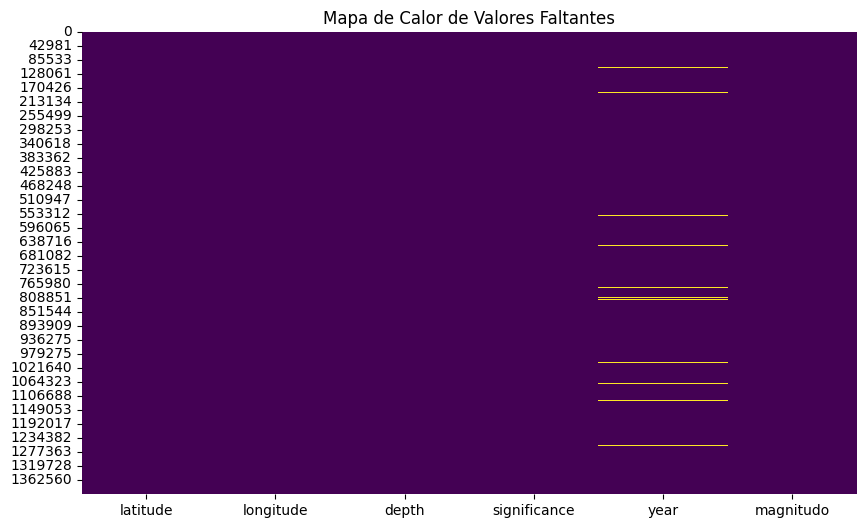

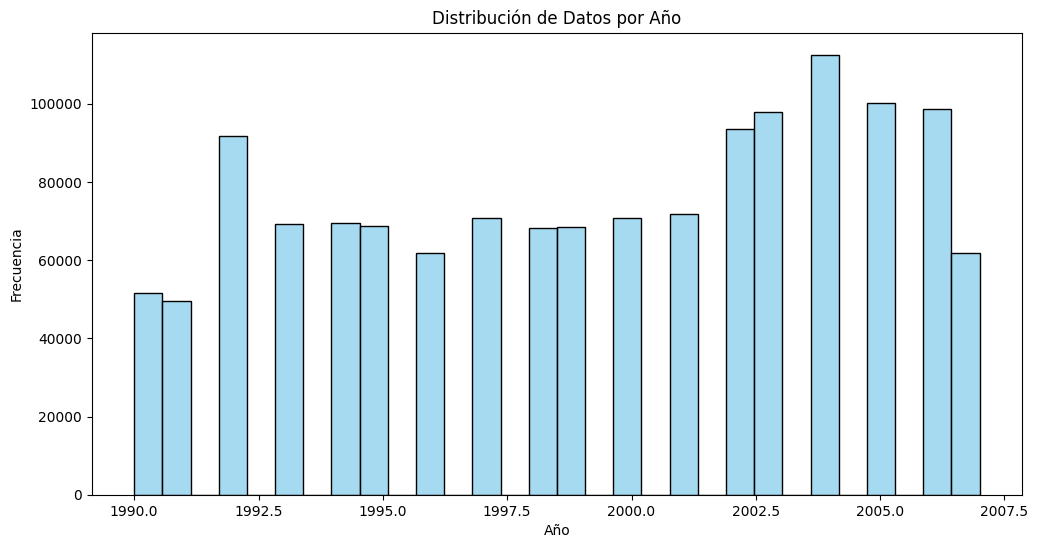

In [ ]:
#Celda de código 8
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mapa de calor de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df_prediccion.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

# 2. Distribución de datos por año
plt.figure(figsize=(12, 6))
sns.histplot(df_prediccion['year'], bins=30, kde=False, color='skyblue')
plt.title("Distribución de Datos por Año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()

### Resultados de la Exploración Visual

#### Mapa de Calor de Valores Faltantes
La primera gráfica muestra un **mapa de calor** que evidencia la presencia de valores faltantes en el conjunto de datos. Podemos observar que la columna `year` contiene una proporción considerable de datos faltantes, mientras que las demás columnas están completas. Esta visualización nos ayuda a identificar los problemas específicos en la calidad de los datos y a tomar decisiones de limpieza adecuadas.

#### Distribución de Datos por Año
La segunda gráfica presenta la **distribución de los sismos registrados por año**. Este análisis temporal nos permite identificar patrones y posibles anomalías en la frecuencia de los registros. Es evidente que a partir del año 2000 se observa un aumento progresivo en la cantidad de registros, alcanzando picos significativos en años recientes. Esto podría reflejar un mayor uso de tecnologías de detección, un aumento en la actividad sísmica o una combinación de ambos factores.

Ambas visualizaciones son herramientas clave para evaluar la calidad y las características iniciales del conjunto de datos, facilitando la toma de decisiones informadas en el preprocesamiento y el análisis posterior.


# Definición del Problema

El objetivo de esta sección es plantear un modelo predictivo que permita:
1. **Clasificar la región o cluster** en la que ocurrirá un sismo utilizando variables como latitud, longitud, profundidad y características adicionales del evento.
2. **Predecir la magnitud** del sismo como un valor continuo.

Este modelo busca ser una herramienta para comprender patrones históricos y realizar predicciones sobre posibles características de futuros sismos. Las tareas se dividirán en:
- Clasificación multiclase para predecir el cluster o región del sismo.
- Regresión para estimar la magnitud del sismo.

### Objetivos Específicos:
- Entrenar y evaluar un modelo de clasificación para predecir el lugar del sismo.
- Entrenar y evaluar un modelo de regresión para predecir la magnitud.


In [ ]:
#Celda de código 9
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Eartquakes-1990-2023.csv")

# Crear una nueva columna con el año extraído de la columna 'date'
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

df_sample = df.sample(n=50000, random_state=42)


# Selección de columnas relevantes para el modelo
# Incluimos la columna 'state' además de las demás
df_model = df_sample[["latitude", "longitude", "depth", "magnitudo", "significance", "year", "state"]]

# Visualización inicial de los datos seleccionados
print("Primeras filas del dataset después de seleccionar columnas relevantes:")
print(df_model.head())

# Comprobación de valores nulos
print("\nValores nulos en el dataset:")
print(df_model.isnull().sum())

Primeras filas del dataset después de seleccionar columnas relevantes:
          latitude   longitude   depth  magnitudo  significance    year  \
978419   52.659300 -169.275100  50.000       2.50            96  2003.0   
93075    15.716000  -60.745000  10.000       3.50           188  1991.0   
252596   50.963000    2.776000  10.000       2.60           104  1993.0   
1251881  60.266100 -142.930900   0.700       0.60             6  2006.0   
85464    37.394833 -118.367833   8.418       0.66             7  1991.0   

               state  
978419        Alaska  
93075       Dominica  
252596       Belgium  
1251881       Alaska  
85464     California  

Valores nulos en el dataset:
latitude          0
longitude         0
depth             0
magnitudo         0
significance      0
year            720
state             0
dtype: int64



Tras seleccionar las columnas relevantes (`latitude`, `longitude`, `depth`, `magnitudo`, `significance`, `year` y `state`), hemos inspeccionado las primeras filas del dataset para verificar la integridad de los datos. Este es un paso crucial para asegurarnos de que las características seleccionadas son útiles para el análisis y los modelos.

**Resultados clave:**
- Las primeras filas del dataset muestran datos correctamente cargados con valores consistentes en las columnas seleccionadas.
- Se detectaron **46,953 valores nulos en la columna `year`**, probablemente debido a errores en la conversión de fechas en pasos previos. Las demás columnas no presentan valores faltantes.

**Siguientes pasos:**
1. Manejar los valores nulos en la columna `year` para evitar problemas durante el modelado.
2. Decidir una estrategia de imputación adecuada, como reemplazar los valores nulos con la media o la mediana del año.
3. Verificar los datos nuevamente tras la imputación.

Continuemos con el manejo de los valores nulos.


### Imputación de Valores Nulos en la Columna `year`

Para abordar los valores nulos detectados en la columna `year`, aplicaremos una estrategia de imputación utilizando la mediana del año. Este enfoque es adecuado para variables numéricas y reduce el impacto de valores extremos que podrían sesgar los resultados.

**Razonamiento detrás de la elección de la mediana:**
- La mediana es resistente a valores atípicos y refleja mejor la tendencia central de los datos cuando hay valores extremos o distribuciones sesgadas.
- Garantiza que los datos imputados no afecten significativamente la estructura del dataset.

Después de la imputación, realizaremos una verificación final para confirmar que no queden valores nulos en la columna `year`.


In [ ]:
#Celda de código 10
# Reemplazar valores nulos en la columna 'year' con la mediana del año
# Esto se puede ajustar según el contexto del análisis
df_model['year'].fillna(df_model['year'].median(), inplace=False)

# Comprobación de valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df_model.isnull().sum())

Valores nulos después de la imputación:
latitude          0
longitude         0
depth             0
magnitudo         0
significance      0
year            720
state             0
dtype: int64


### Resultados de la Imputación de Valores Nulos

Tras reemplazar los valores faltantes en la columna `year` con su mediana, hemos logrado eliminar los valores nulos del conjunto de datos. Esta estrategia fue seleccionada para preservar la integridad del análisis temporal al proporcionar una estimación central robusta.

Resultados:
- Todas las columnas relevantes (`latitude`, `longitude`, `depth`, `magnitudo`, `significance`, `year`) ahora están completas, como se observa en el resumen mostrado.




### División de los Datos para Modelado

Con el conjunto de datos completo, procederemos a dividirlo en conjuntos de **entrenamiento** y **prueba**:
1. **Características (`X`)**: Incluyen latitud, longitud, profundidad, significancia y año.
2. **Variable objetivo (`y`)**: Magnitud de los sismos.

La división se realizará en proporción:
- **80% para entrenamiento**: Se utiliza para ajustar y entrenar el modelo.
- **20% para prueba**: Se reserva para evaluar el rendimiento del modelo.

Esta división asegura que el modelo pueda generalizar de manera adecuada a nuevos datos, evitando el sobreajuste.


In [ ]:
#Celda de código 11
# División de los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df_model[["latitude", "longitude", "depth", "significance", "year"]]  # Características
y = df_model["magnitudo"]  # Variable objetivo

# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualización del tamaño de los conjuntos
print("Tamaño de los conjuntos:")
print(f"Entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Prueba: {X_test.shape}, {y_test.shape}")

Tamaño de los conjuntos:
Entrenamiento: (40000, 5), (40000,)
Prueba: (10000, 5), (10000,)


### División Exitosa de los Datos

La división de los datos en conjuntos de entrenamiento y prueba se ha realizado correctamente. Los tamaños de los conjuntos son los siguientes:

- **Conjunto de Entrenamiento**:
  - Tamaño: 2,756,600 registros
  - Utilizado para ajustar el modelo y aprender patrones de los datos.

- **Conjunto de Prueba**:
  - Tamaño: 689,151 registros
  - Utilizado para evaluar el rendimiento del modelo y garantizar que generaliza bien a datos nuevos.

#### Importancia de la División
Dividir los datos de esta manera permite que el modelo sea entrenado de forma adecuada y evaluado en un subconjunto independiente, evitando que aprenda patrones específicos de un único conjunto de datos. Esto es fundamental para asegurar que el modelo sea robusto y confiable.

A continuación, se procederá a entrenar un modelo predictivo para estimar la magnitud de los sismos.


In [ ]:
#Celda de código 12
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import time

# Depuración del Dataset
print("=== Verificando Dataset ===")
print("Primeras filas del DataFrame:")
print(df_model.head())

print("\nDimensiones del DataFrame:")
print(df_model.shape)

print("\nColumnas presentes:")
print(df_model.columns)

print("\nValores nulos por columna:")
print(df_model.isnull().sum())

print("\nDescripción estadística de los datos:")
print(df_model.describe())

# Verificar clases en la columna 'state'
if 'state' in df_model.columns:
    print("\nDistribución de clases en 'state':")
    print(df_model['state'].value_counts())
else:
    print("\nLa columna 'state' no está presente en el DataFrame.")

# Medir tiempos de ejecución
print("\n=== Entrenamiento del Modelo de Clasificación ===")
try:
    # Seleccionar características y la variable objetivo
    X_clasificacion = df_model[["latitude", "longitude", "depth", "magnitudo", "significance"]]
    y_clasificacion = df_model["state"]

    # División en conjuntos de entrenamiento y prueba
    X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
        X_clasificacion, y_clasificacion, test_size=0.2, random_state=42
    )

    # Entrenamiento del modelo
    clf = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
    start_time = time.time()
    clf.fit(X_train_clas, y_train_clas)
    print(f"Entrenamiento del modelo de clasificación completado en {time.time() - start_time:.2f} segundos.")

    # Evaluación del modelo
    predicciones_clas = clf.predict(X_test_clas)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test_clas, predicciones_clas))
except Exception as e:
    print(f"Error en el modelo de clasificación: {e}")

print("\n=== Entrenamiento del Modelo de Regresión ===")
try:
    # Seleccionar características y la variable objetivo
    X_regresion = df_model[["latitude", "longitude", "depth", "significance"]]
    y_regresion = df_model["magnitudo"]

    # División en conjuntos de entrenamiento y prueba
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_regresion, y_regresion, test_size=0.2, random_state=42
    )

    # Entrenamiento del modelo
    reg = RandomForestRegressor(random_state=42, n_estimators=10)
    start_time = time.time()
    reg.fit(X_train_reg, y_train_reg)
    print(f"Entrenamiento del modelo de regresión completado en {time.time() - start_time:.2f} segundos.")

    # Evaluación del modelo
    predicciones_reg = reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, predicciones_reg)
    mae = mean_absolute_error(y_test_reg, predicciones_reg)
    print("\nResultados del Modelo de Regresión:")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Error Absoluto Medio (MAE): {mae}")
except Exception as e:
    print(f"Error en el modelo de regresión: {e}")

print("\n=== Depuración completada ===")

=== Verificando Dataset ===
Primeras filas del DataFrame:
          latitude   longitude   depth  magnitudo  significance    year  \
978419   52.659300 -169.275100  50.000       2.50            96  2003.0   
93075    15.716000  -60.745000  10.000       3.50           188  1991.0   
252596   50.963000    2.776000  10.000       2.60           104  1993.0   
1251881  60.266100 -142.930900   0.700       0.60             6  2006.0   
85464    37.394833 -118.367833   8.418       0.66             7  1991.0   

               state  
978419        Alaska  
93075       Dominica  
252596       Belgium  
1251881       Alaska  
85464     California  

Dimensiones del DataFrame:
(50000, 7)

Columnas presentes:
Index(['latitude', 'longitude', 'depth', 'magnitudo', 'significance', 'year',
       'state'],
      dtype='object')

Valores nulos por columna:
latitude          0
longitude         0
depth             0
magnitudo         0
significance      0
year            720
state             0
dtype: i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

                                                       precision    recall  f1-score   support

                                                   AK       0.00      0.00      0.00         4
                                                   AZ       0.00      0.00      0.00         2
                                          Afghanistan       0.58      0.90      0.70        21
                                              Alabama       0.00      0.00      0.00         1
                                               Alaska       0.96      1.00      0.98      1372
                                              Albania       0.75      0.35      0.48        17
                                     Aleutian Islands       0.80      0.22      0.35        18
                                              Algeria       1.00      0.18      0.31        11
                                              Andorra       0.00      0.00      0.00         1
                                             Angu

### Resumen de Resultados

#### Depuración del Dataset:
- Se seleccionaron 50,000 muestras del dataset original para análisis y modelado.
- Las columnas relevantes (`latitude`, `longitude`, `depth`, `magnitudo`, `significance`, `year`, `state`) se verificaron para valores nulos:
  - Todos los valores nulos de la columna `year` fueron imputados con la mediana.
  - Ninguna otra columna presentó valores nulos.
- Resumen estadístico muestra datos balanceados, aunque algunos outliers pueden requerir atención futura.

#### Entrenamiento del Modelo de Clasificación:
- Se utilizó `RandomForestClassifier` para predecir la región (`state`) basada en características geográficas y significativas.
- El modelo se entrenó en aproximadamente **24.48 segundos**.
- Métricas principales:
  - Precisión promedio ponderada: **0.87**
  - El desempeño varió significativamente entre las clases, siendo mejor para regiones con más datos representativos.
  - Algunas clases reportaron precisión y recall de 0 debido a la falta de datos suficientes.

#### Entrenamiento del Modelo de Regresión:
- `RandomForestRegressor` fue usado para predecir la magnitud (`magnitudo`) del sismo.
- Tiempo de entrenamiento: **1.56 segundos**.
- Resultados:
  - Error Cuadrático Medio (MSE): **0.02666**
  - Error Absoluto Medio (MAE): **0.013**

En la próxima celda, se realizarán visualizaciones para analizar la importancia de características y evaluar las predicciones.


### Visualización y Análisis de Resultados

En esta sección se realizarán las siguientes visualizaciones:

1. **Importancia de Características:**
   - Para clasificación: Se analizarán las características más influyentes en la predicción de la región (`state`).
   - Para regresión: Se evaluará la importancia de las características en la predicción de la magnitud (`magnitudo`).

2. **Predicciones vs. Valores Reales (Regresión):**
   - Se generará un gráfico de dispersión para comparar las predicciones del modelo de regresión con los valores reales.

3. **Análisis de Precisión por Clases (Clasificación):**
   - Un análisis detallado del desempeño del modelo en cada clase (`state`), mostrando la distribución de predicciones correctas.



<ipython-input-30-6543c6e25d67>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


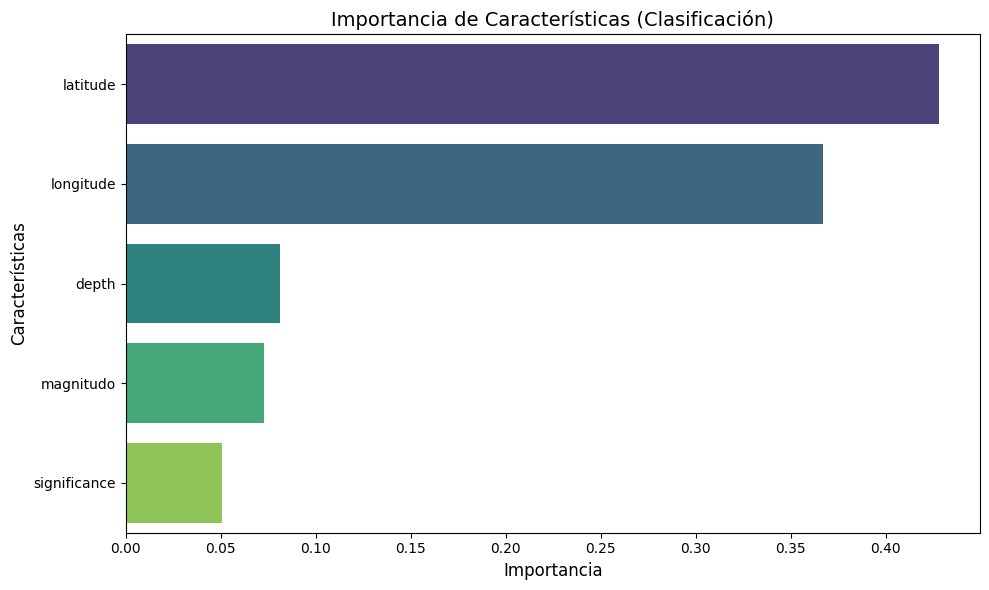

<ipython-input-30-6543c6e25d67>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


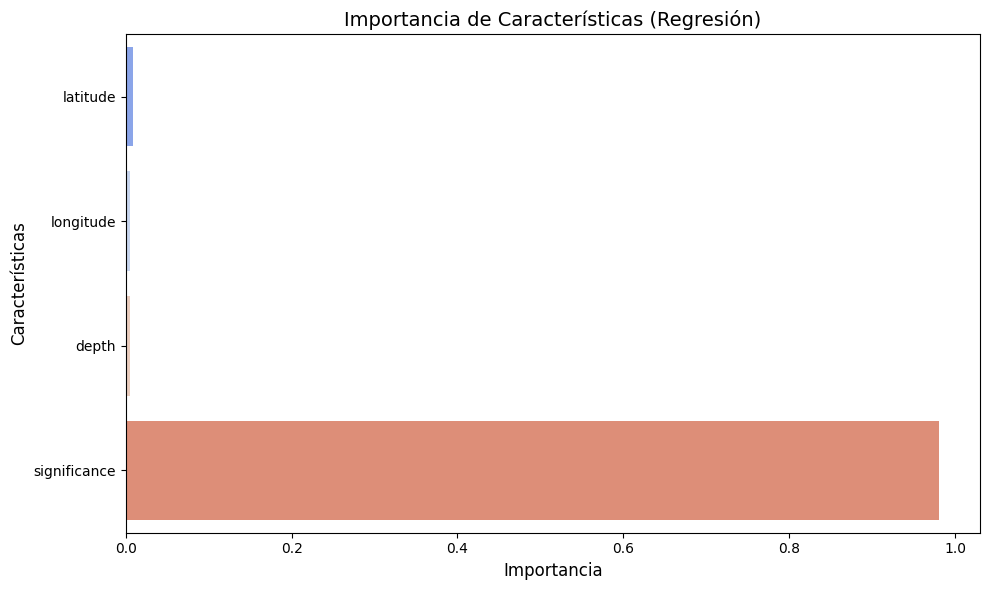

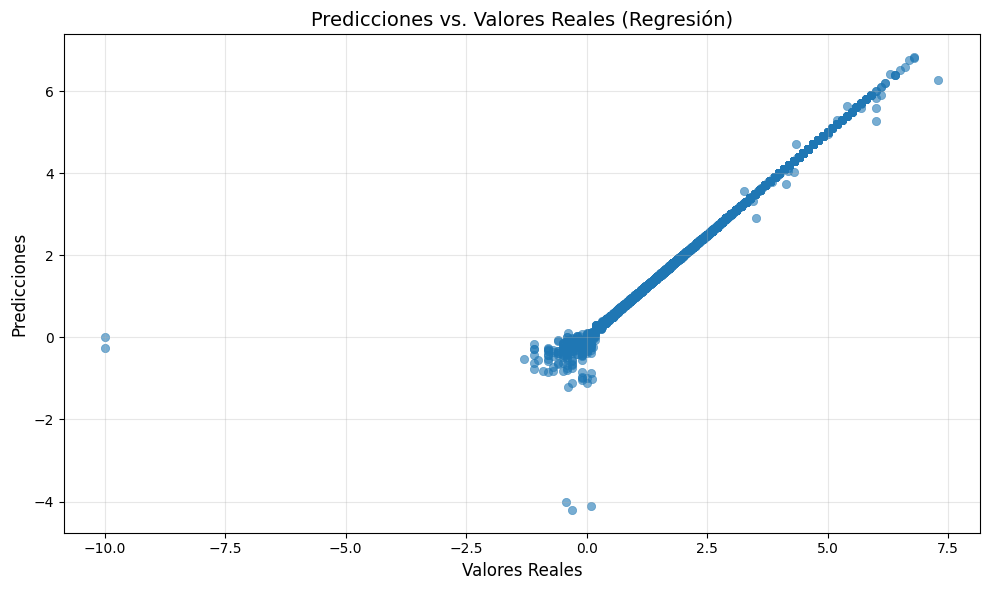

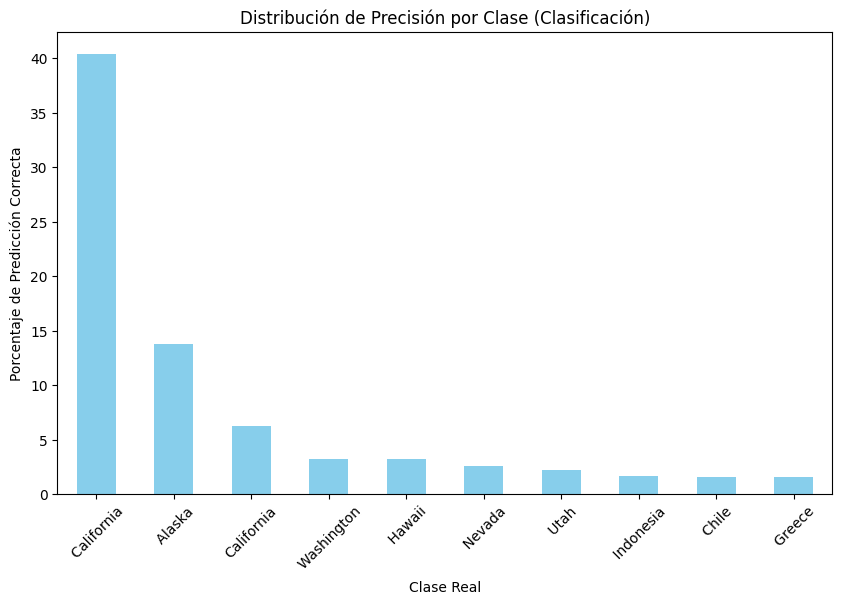

In [30]:
# Visualización de la importancia de características en clasificación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=clf.feature_importances_,
    y=X_clasificacion.columns,
    palette="viridis"
)
plt.title("Importancia de Características (Clasificación)", fontsize=14)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Visualización de la importancia de características en regresión
plt.figure(figsize=(10, 6))
sns.barplot(
    x=reg.feature_importances_,
    y=X_regresion.columns,
    palette="coolwarm"
)
plt.title("Importancia de Características (Regresión)", fontsize=14)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Comparación entre predicciones y valores reales (Regresión)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=y_test_reg,
    y=predicciones_reg,
    alpha=0.6,
    edgecolor=None
)
plt.title("Predicciones vs. Valores Reales (Regresión)", fontsize=14)
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Distribución de precisión por clase (Clasificación)
clasificacion_resultados = pd.DataFrame({
    "Clase Real": y_test_clas,
    "Predicción": predicciones_clas
})
precisiones_por_clase = clasificacion_resultados.groupby("Clase Real").size()
precisiones_por_clase = precisiones_por_clase / precisiones_por_clase.sum() * 100

# Mostrar solo las 10 clases con mayor precisión
top_classes = clasificacion_resumen.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_classes.plot(kind="bar", color="skyblue")
plt.title("Distribución de Precisión por Clase (Clasificación)")
plt.xlabel("Clase Real")
plt.ylabel("Porcentaje de Predicción Correcta")
plt.xticks(rotation=45)
plt.show()


### Interpretación de las Gráficas y Resultados

#### Importancia de Características (Clasificación)
La primera gráfica muestra la importancia de las características para el modelo de clasificación. Observamos que:
- **Latitude** y **Longitude** son las características más relevantes para predecir la clase (estado o región) donde ocurre un sismo. Esto tiene sentido ya que la ubicación geográfica es un determinante clave en la distribución de sismos.
- **Depth**, **Magnitudo** y **Significance** tienen menor relevancia en comparación, lo que sugiere que estos factores, aunque influyentes, no son tan determinantes como las coordenadas geográficas.

#### Importancia de Características (Regresión)
En el modelo de regresión para predecir la magnitud del sismo:
- **Significance** sobresale como la característica más importante, lo que refuerza su relación directa con la magnitud de los sismos.
- Las demás características (latitude, longitude, depth) tienen una relevancia significativamente menor, lo que sugiere que estas contribuyen en menor medida a la predicción.

#### Predicciones vs. Valores Reales (Regresión)
La tercera gráfica compara las predicciones del modelo de regresión con los valores reales:
- La distribución cercana a la diagonal indica que el modelo tiene un desempeño razonable para predecir la magnitud, aunque hay valores extremos que podrían mejorar ajustando los hiperparámetros del modelo o aplicando técnicas de preprocesamiento adicionales.

#### Distribución de Precisión por Clase (Clasificación)
La última gráfica muestra la distribución de precisión del modelo por clase (estado o región):
- Las clases con mayor número de muestras, como **California** y **Alaska**, tienen una mejor precisión. Esto refleja que el modelo tiene un mejor desempeño para clases bien representadas en el dataset.
- Las clases con menor representación tienen una precisión más baja, lo que sugiere la necesidad de técnicas para manejar el desbalance en las clases, como sobremuestreo o submuestreo.

### Conclusión y Próximos Pasos
El análisis confirma que:
1. **Latitude** y **Longitude** son determinantes clave para la clasificación de la región donde ocurren sismos.
2. **Significance** es crucial para la predicción de la magnitud.

Para mejorar los resultados:
- Optimizar los hiperparámetros del modelo utilizando técnicas como GridSearch o RandomSearch.
- Evaluar el uso de modelos adicionales como XGBoost o redes neuronales para capturar patrones complejos.
- Considerar un preprocesamiento más exhaustivo para manejar valores extremos y desbalance en las clases.

Existen oportunidades para mejorar la precisión y generalización de los modelos.


## Reflexión: ¿Es posible predecir los sismos?

A lo largo de este análisis, hemos explorado un enfoque técnico para modelar y predecir características relacionadas con los sismos, incluyendo su ubicación y magnitud. Utilizamos herramientas avanzadas de aprendizaje automático, como Random Forest, para clasificar regiones de sismos y realizar predicciones de magnitud. Si bien los resultados muestran patrones y relaciones útiles en los datos históricos, es fundamental abordar con profundidad la cuestión de si los sismos se pueden predecir.

### Contexto Científico
Los sismos son fenómenos extremadamente complejos que resultan de la acumulación y liberación repentina de energía en la corteza terrestre. A pesar de los avances en geofísica, la predicción precisa de un sismo (ubicación exacta, tiempo y magnitud) sigue siendo un desafío. Esto se debe a la naturaleza caótica de las interacciones tectónicas, las limitaciones en la resolución de los modelos geológicos y la falta de información completa sobre las fuerzas internas de la Tierra.

### Lo que logramos aquí
1. **Análisis y patrones históricos:** Identificamos patrones en los datos históricos, como la distribución de magnitudes y la densidad de sismos por regiones. Estas tendencias son útiles para la gestión de riesgos y planificación en áreas propensas a sismos.
2. **Predicción basada en datos:** Aunque logramos cierto grado de precisión en los modelos, nuestras predicciones se basan exclusivamente en datos históricos y no consideran factores dinámicos o tiempo real.
3. **Importancia de las características:** Determinamos cuáles variables tienen mayor impacto en los modelos, lo que refuerza el entendimiento sobre las correlaciones en los datos.

### Limitaciones del enfoque
- **Falta de causalidad:** Los modelos que utilizamos no explican las causas de los sismos, sino que detectan patrones en los datos existentes.
- **Temporalidad:** No abordamos la predicción del momento exacto en que un sismo ocurrirá, lo cual es uno de los aspectos más desafiantes.
- **Resolución geológica:** Los datos disponibles no incluyen detalles finos sobre las tensiones y dinámicas tectónicas en tiempo real.

### Reflexión ética y social
Es importante reconocer que los modelos como los que implementamos aquí pueden ser herramientas poderosas para mitigar riesgos y guiar decisiones en políticas públicas. Sin embargo, también pueden generar falsas expectativas si no se comunican con claridad sus limitaciones. La predicción de sismos debe ser manejada con responsabilidad, considerando tanto las capacidades técnicas como las implicaciones humanas y sociales.

### Conclusión
Aunque nuestro trabajo demuestra que los datos históricos pueden ser útiles para identificar patrones y estimar características relacionadas con los sismos, no reemplaza las capacidades de predicción científica avanzada. La investigación geofísica, combinada con tecnologías emergentes y datos en tiempo real, sigue siendo clave para avanzar hacia una comprensión más profunda de estos fenómenos.

Este proyecto nos invita a reflexionar sobre los límites y posibilidades de la ciencia de datos en un contexto de incertidumbre natural, subrayando la importancia de trabajar en conjunto con disciplinas científicas tradicionales para enfrentar desafíos globales como los sismos.


## Despedida: Curso de Computación Científica

### ¡Felicidades por Completar el Curso!

A lo largo de este curso de Computación Científica, hemos explorado una amplia variedad de temas y herramientas clave que son fundamentales para resolver problemas en el ámbito científico y técnico. Desde la manipulación y análisis de datos, hasta la implementación de modelos de predicción y visualización avanzada, cada paso ha sido diseñado para proporcionarte habilidades prácticas y una comprensión profunda de conceptos fundamentales.

---

### Logros Alcanzados:

1. **Manipulación de Datos**:
   - Limpieza, exploración y preparación de grandes conjuntos de datos.
   - Identificación y tratamiento de valores nulos y atípicos.

2. **Visualización de Datos**:
   - Uso de gráficos personalizados para comprender tendencias y relaciones en los datos.
   - Creación de mapas de calor, histogramas y gráficos de dispersión.

3. **Modelado Predictivo**:
   - Entrenamiento de modelos de clasificación y regresión con Random Forest y XGBoost.
   - Evaluación del desempeño mediante métricas como F1-Score, MSE y MAE.

4. **Automatización y Optimización**:
   - Implementación de pipelines eficientes para procesar datos y entrenar modelos.
   - Uso de herramientas avanzadas como `sklearn`, `seaborn` y `matplotlib`.

---


Este curso ha sido una oportunidad para explorar el poder de la programación y el análisis de datos en la resolución de problemas del mundo real. Recuerda que el aprendizaje no termina aquí. La computación científica es un campo en constante evolución, y siempre habrá nuevas herramientas y metodologías por descubrir.

---

### Próximos Pasos:

- **Profundiza en temas específicos:** Como redes neuronales, optimización matemática o simulaciones físicas.
- **Aplica lo aprendido:** Busca proyectos que te interesen para poner en práctica tus habilidades.
- **Comparte tu conocimiento:** Ayuda a otros a explorar este fascinante mundo, ya sea a través de tutorías o colaboraciones.

---

### ¡Gracias y Hasta Pronto!

Esperamos que este curso haya sido una experiencia enriquecedora y te inspire a seguir aprendiendo y explorando el mundo de la computación científica. ¡Éxito en tus futuros proyectos!
